____Exploring Weather Trends____

__Imported CSV file in Jupyter Notebook using Pandas as follows__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__After reading in the data, Checked the data for any imbalance in classes
i.e. missing values in data using the following:__

In [2]:
df = pd.read_csv('yearly_average_temp.csv')
df.head()

,year,global_avg_temp,city_avg_temp
0,1796,8.27,25.03
1,1797,8.51,26.71
2,1798,8.67,24.29
3,1799,8.51,25.28
4,1800,8.48,25.21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   global_avg_temp  218 non-null    float64
 2   city_avg_temp    201 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.2 KB


- __From the above tables, the “year” and “global_avg_temp” had same number of values but the column for “city_avg_temp” had 17 missing values. So, in order to balance the data, dropped the rows with “NaN” for the “city_avg_temp” values.__
- __Calculated the Moving Averages with a  function for “global_avg_temp” and “city_avg_temp” columns to see the trend in the trends in temperature readings over years using rolling function from pandas as follows:__

 - In the below function, the inputs to the “moving_averages” function are “data” i.e. the original dataframe and “window_size” i.e. size of the moving window. This is the number of observations used for calculating the statistic. Each window is of a fixed size.
 - Additionally, this function takes care of dropping the rows for which the“city_avg_temp” is a “NaN” by using __“dropna()”__.

In [6]:
# Function to get rolling averga values
def moving_averages(data=None, window_size=None):
    df_roll_avg = data.rolling(window=window_size, center=False, on='year').mean().dropna()
    return df_roll_avg

- For this dataset,tried different values for the rolling window sizes but settled down for a value of 9.

In [7]:
# Rolling Window Size
roll_window_size = 9

# Moving Average
mov_avg = moving_averages(data=df, window_size=roll_window_size)

In [8]:
mov_avg.head()

,year,city_avg_temp,global_avg_temp
8,1804,25.270000,8.550000
9,1805,25.300000,8.582222
10,1806,25.134444,8.573333
11,1807,25.210000,8.530000
25,1821,24.128889,7.488889


- Next, Ploted the moving average temperature using matplotlib. The final plot looks like follows:

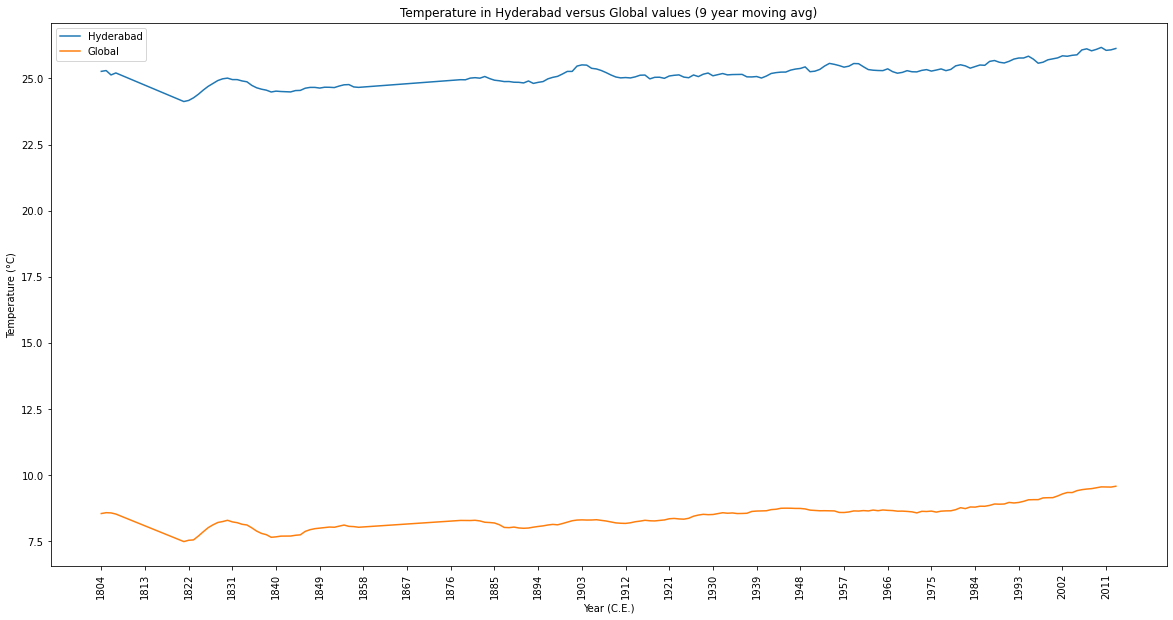

In [29]:
# Plot Moving Averages
min_year = mov_avg['year'].iloc[0]
max_year = mov_avg['year'].iloc[176]

plt.figure(figsize=(20,10))
plt.plot(mov_avg['year'], mov_avg['city_avg_temp'], label='Hyderabad')
plt.plot(mov_avg['year'], mov_avg['global_avg_temp'], label='Global')
plt.legend(loc='best')
#plt.grid(True)
plt.xticks(np.arange(min_year, max_year, 9.0), rotation='vertical')
plt.xlabel("Year (C.E.)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature in Hyderabad versus Global values ({} year moving avg)".format(roll_window_size));

Observations:
- From the above plot, the global moving average temperature lies between 7.15 to 8.67 Degrees Celsius.
- For Hyderabad, the moving average temperature lies in the range of 23.8 to 26.5 Degree Celsius.
- The above plot shows that the moving average temperature for Hyderabad is more than the Global moving average temperature which infers that Hyderabad is hotter in comparison of the Global temperature.